In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np

### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

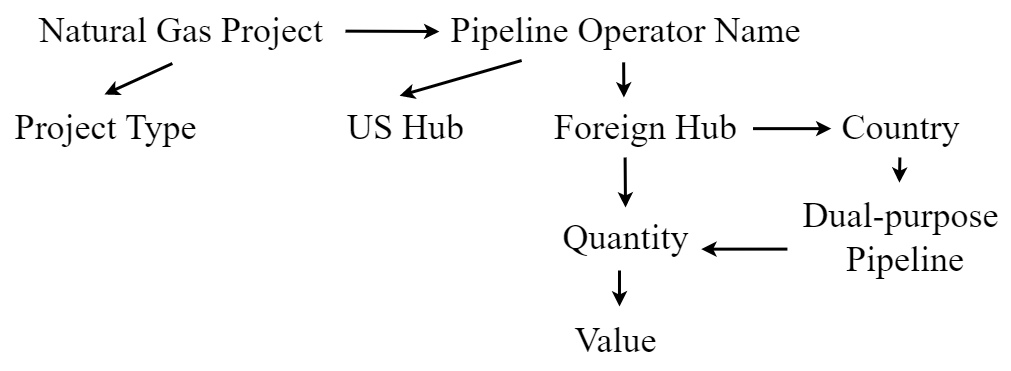

In [2]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Natural Gas Project, Value | Foreign Hub)?  

CI (Natural Gas Project, Value | Pipeline Operator Name)?  

CI (Foreign Hub, Dual-Purpose Pipeline | Country)? 

CI (Foreign Hub, Dual-Purpose Pipeline | County, Value)? 

2) Now consider a smaller dataset with four discrete attributes (Pipeline Operator, US Hub, Foreign Hub, Quantity) as in as in HW3Q1_2.png, and the following conditional probability distributions:

Pipeline Operator: YHVA (70%), PLMG (30%)

Foreign Hub | Pipeline Operator Name = YHVA: Mexico Northeast Region (40%), Mexico Central Region (60%)

Foreign Hub | Pipeline Operator Name = PLMG: Mexico Northeast Region (100%)

US Hub | Pipeline Operator Name = PLMG: US Hub (100%)

US Hub | Pipeline Operator Name = YHVA: US Hub (100%)

Quantity | Pipeline Operator Name = YHVA, Foreign Hub = Mexico Northeast Region: Natural Gas (95%), Hydrogen (5%)

Quantity | Pipeline Operator Name = PLMG, Foreign Hub = Mexico Northeast Region: Natural Gas (98%), Hydrogen (2%)

Quantity | Pipeline Operator Name = YHVA, Foreign Hub = Mexico Central Region: Natural Gas (96%), Hydrogen (4%)

Which of the following cases is most anomalous?

a) Natural gas transported from the Mexico Northeast Region to a US Hub by PLMG

b) Natural gas transported from the Mexico Northeast Region to a US Hub by YHVA

c) Hydrogen trasported from the Mexico Central Region to a US Hub by YHVA

To answer this question, compute the likelihood of each fuel (natural gas and hydrogen) given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

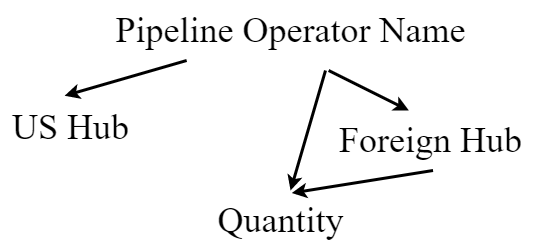

In [3]:
Image('HW3Q1_2.png')

## (Your answers here, including all calculations)


### For 1)
If conditional independence relationships hold,then P(A,B|C)=P(A|C)P(B|C)  
According to the D-separation algorithm  
(Natural Gas Project, Value | Foreign Hub) is conditional independence  
(Natural Gas Project, Value | Pipeline Operator Name）is conditional independence  
(Foreign Hub, Dual-Purpose Pipeline | Country) is conditional independence   
(Foreign Hub, Dual-Purpose Pipeline | County, Value) is Dependent because Value is descendent of Quantity

### For 2)  
a)  
Natural gas transported from the Mexico Northeast Region to a US Hub by PLMG  
   P(Natural gas | Mexico Northeast Region & PLMG & US Hub)   
 =P(Natural gas | Mexico Northeast Region & PLMG)  
 =0.98  
    P(Natural gas & Mexico Northeast Region & PLMG & US Hub)   
 =P(Natural gas | Mexico Northeast Region & PLMG) * P(Mexico Northeast Region | PLMG) * P( US Hub | PLMG) * P(PLMG)   
 =0.98 * 1 * 1 * 0.3  
 =0.294  
 b)  
 Natural gas transported from the Mexico Northeast Region to a US Hub by YHVA  
   P(Natural gas | Mexico Northeast Region & YHVA & US Hub)   
 =P(Natural gas | Mexico Northeast Region & YHVA)  
 =0.95  
     P(Natural gas & Mexico Northeast Region & YHVA & US Hub)   
 =P(Natural gas | Mexico Northeast Region & YHVA) * P(Mexico Northeast Region | YHVA) * P( US Hub | YHVA) * P(YHVA)   
 =0.95 * 0.4 * 1 * 0.7  
 =0.266  
 c)  
 Hydrogen trasported from the Mexico Central Region to a US Hub by YHVA
   P(Hydrogen | Mexico Central Region & YHVA & US Hub)   
 =P(Hydrogen | Mexico Central Region & YHVA)  
 =0.04  
     P(Hydrogen & Mexico Central Region & YHVA & US Hub)   
 =P(Hydrogen | Mexico Central Region & YHVA) * P(Mexico Central Region | YHVA) * P( US Hub | YHVA) * P(YHVA)   
 =0.04 * 0.6 * 1 * 0.7  
 =0.0168
###  Thus, with lowest likelihood, c) is most anomalous

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [13]:
# You will need to install pgmpy
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,0,0,0,1,1,0
2,1,0,1,1,1,1
3,1,0,0,1,1,1
4,2,1,0,0,1,1


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [14]:
# your answers here
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.estimators import BayesianEstimator

In [15]:
hc = HillClimbSearch(train)
best_model = hc.estimate(scoring_method=BicScore(train))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('C', 'A'), ('D', 'A'), ('F', 'A')]


In [16]:
model = BayesianModel([('C', 'A'), ('D', 'A'), ('F', 'A')])
model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of C:
+------+--------+
| C(0) | 0.5015 |
+------+--------+
| C(1) | 0.4985 |
+------+--------+
CPD of A:
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| C    | C(0)                 | C(0)                  | ... | C(1)                  | C(1)                 |
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| D    | D(0)                 | D(0)                  | ... | D(1)                  | D(1)                 |
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| F    | F(0)                 | F(1)                  | ... | F(0)                  | F(1)                 |
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| A(0) | 0.4965893587994543   | 0.0013404825737265416 | ... | 0.517555266579974     | 0.001349527665317139 |
+------+----------

C:\Users\ljs11\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [17]:
predicted_test = model.predict(test.loc[:,["C","D","F"]])
print("Out of sample:",(test.loc[:,'A'].reset_index(drop=True)==predicted_test['A']).mean())

  0%|          | 0/8 [00:00<?, ?it/s]

Out of sample: 0.5645


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points+20 bonus points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (10 pts).

c) **(Bonus)** Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (10 pts)  

d) **(Bonus)** Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (10 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (10 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [11]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [12]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


your answers here  
a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster. (5 pts)

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

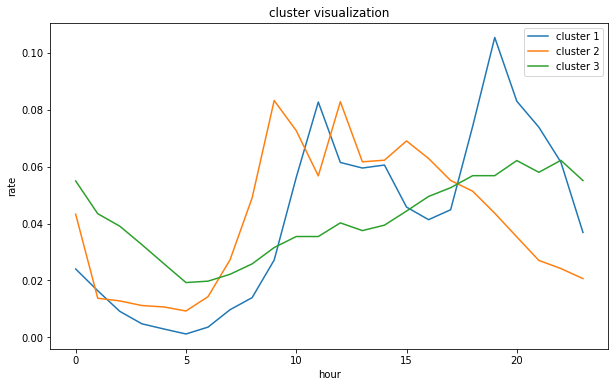

In [22]:
data_hour = data3.loc[:, 'hour_0':'hour_23']
# data_hour.head()
km = KMeans(random_state=20221111,n_clusters=3)
res=km.fit(data_hour)

data_hour['Label'] = res.labels_
# data_hour.head()
data_hour_mean = data_hour.groupby(by='Label').mean()
# data_hour_mean.head()

fig = plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(range(24), 
         data_hour_mean.iloc[i], 
         label = 'cluster {}'.format(i+1)) 

plt.title('cluster visualization')
plt.xlabel('hour')
plt.ylabel('rate')
plt.legend()
plt.show()

b) Describe the three different hour-of-day trends represented by these three clusters (10 pts).

cluster 1 and cluster 2 show fluctuating trends during the day, cluster 3 grows slowly.

c) (Bonus) Do you notice any consistent trends about which crime types are assigned to which cluster? Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (10 pts)

In [23]:
data_taskc = data3[['crime_type']]
data_taskc['Label'] = res.labels_
data_taskc

C:\Users\ljs11\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,crime_type,Label
0,ARSON: BY FIRE,2
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,2
2,ASSAULT: AGGRAVATED: HANDGUN,2
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,2
4,ASSAULT: AGGRAVATED: OTHER FIREARM,2
...,...,...
114,THEFT: RETAIL THEFT,1
115,WEAPONS VIOLATION: RECKLESS FIREARM DISCHARGE,2
116,WEAPONS VIOLATION: UNLAWFUL POSS OF HANDGUN,2
117,WEAPONS VIOLATION: UNLAWFUL USE HANDGUN,2


In [24]:
data_taskc['crime_type'] = data_taskc['crime_type'].str.split(':',0, expand=True)[0]
data_taskc[data_taskc['Label']==0].groupby('crime_type')['crime_type'].count()

C:\Users\ljs11\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


crime_type
CRIMINAL TRESPASS                    1
DECEPTIVE PRACTICE                   1
GAMBLING                             1
INTERFERENCE WITH PUBLIC OFFICER     1
NARCOTICS                           12
OTHER OFFENSE                        5
PUBLIC PEACE VIOLATION               1
WEAPONS VIOLATION                    1
Name: crime_type, dtype: int64

In [25]:
data_taskc[data_taskc['Label']==1].groupby('crime_type')['crime_type'].count()

crime_type
ASSAULT                       2
BATTERY                       2
BURGLARY                      2
CRIMINAL TRESPASS             1
DECEPTIVE PRACTICE            9
NARCOTICS                     1
OFFENSE INVOLVING CHILDREN    3
OTHER OFFENSE                 7
PUBLIC PEACE VIOLATION        1
SEX OFFENSE                   1
THEFT                         4
Name: crime_type, dtype: int64

In [26]:
data_taskc[data_taskc['Label']==2].groupby('crime_type')['crime_type'].count()

crime_type
ARSON                                1
ASSAULT                              5
BATTERY                             11
BURGLARY                             2
CRIM SEXUAL ASSAULT                  2
CRIMINAL DAMAGE                      5
CRIMINAL TRESPASS                    2
DECEPTIVE PRACTICE                   2
HOMICIDE                             1
INTERFERENCE WITH PUBLIC OFFICER     1
LIQUOR LAW VIOLATION                 1
MOTOR VEHICLE THEFT                  3
NARCOTICS                            2
OFFENSE INVOLVING CHILDREN           1
OTHER OFFENSE                        5
PROSTITUTION                         1
ROBBERY                              9
SEX OFFENSE                          2
STALKING                             1
THEFT                                3
WEAPONS VIOLATION                    3
Name: crime_type, dtype: int64

cluster 1: NARCOTICS 

cluster 2: DECEPTIVE PRACTICE

cluster 3: BATTERY & ROBBERY 

d) (Bonus) Do the three clusters have different day-of-week trends? Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences. (10 pts)

In [30]:
data_day = data3.loc[:, 'day_Sun':'day_Sat']
# data_day.head()
data_day['Label'] = res.labels_
data_day_mean = data_day.groupby(by='Label').mean()
# data_day_mean.head()

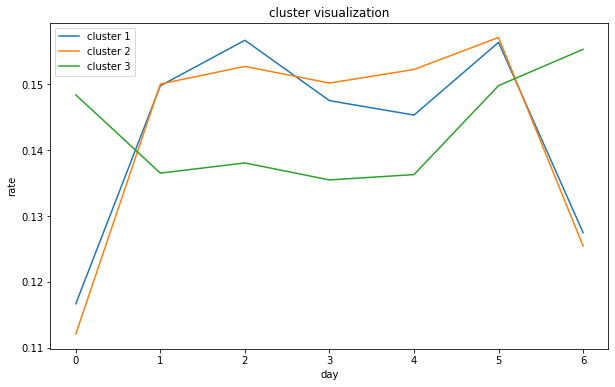

In [31]:
fig = plt.figure(figsize=(10,6))

for i in range(3):
    plt.plot(range(7), 
         data_day_mean.iloc[i], 
         label = 'cluster {}'.format(i+1)) 

plt.title('cluster visualization')
plt.xlabel('day')
plt.ylabel('rate')
plt.legend()
plt.show()

cluster 3 fluctuates relatively little, but its crime levels increase on weekends  
while cluster 1 and 2 crime levels decrease on weekends

e) Do the three clusters affect different types of communities/neighborhoods? To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster. You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.). You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (10 pts)

In [34]:
data_taske = data3.loc[:, 'community_area_1':'community_area_77']
data_taske['Label'] = res.labels_
# data_taske.head()
data_taske=data_taske.groupby(by='Label').sum()
data_taske_t=pd.DataFrame(data_taske.values.T,index=data_taske.columns,columns=data_taske.index)
# data_taske_t.head()
data_taske_per = data_taske_t.div(data_taske_t.sum(axis=0), axis=1)
data_taske_per.head()

Label,0,1,2
community_area_1,0.008226,0.014488,0.013995
community_area_2,0.005906,0.013502,0.012911
community_area_3,0.008449,0.016262,0.013156
community_area_4,0.003058,0.010105,0.007072
community_area_5,0.001272,0.006886,0.004093


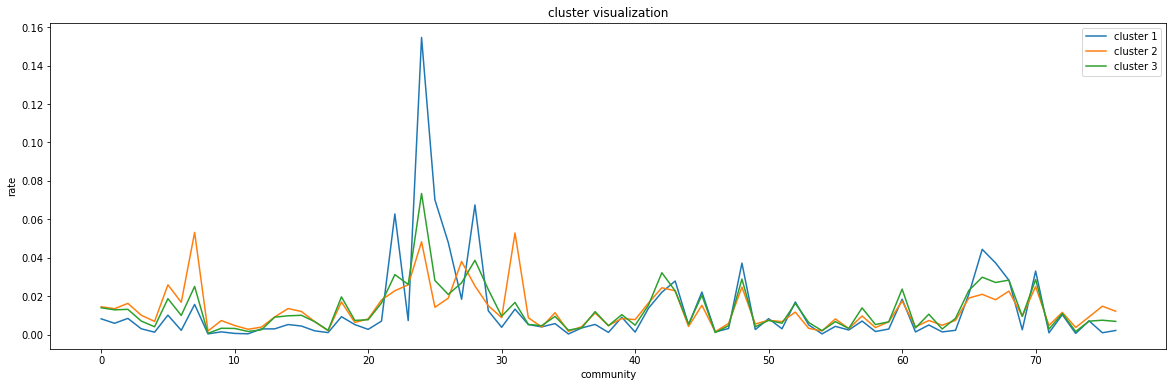

In [35]:
fig = plt.figure(figsize=(20,6))

for i in range(3):
    plt.plot(range(77), 
         data_taske_per[i], 
         label = 'cluster {}'.format(i+1)) 
    
plt.title('cluster visualization')
plt.xlabel('community')
plt.ylabel('rate')
plt.legend()
plt.show()

community 22-28 have disproportionate amounts of given clusters.

In [36]:
comm_special = data4.loc[(data4['Community Area Number'] >= 22) & (data4['Community Area Number'] <= 28)]
comm_special.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
21,22,Logan Square,1156611.578,1914944.004,3.2,16.8,8.2,14.8,26.2,31908,9.647233,5112
22,23,Humboldt park,1151216.159,1906926.141,14.8,33.9,17.3,35.4,38.0,13781,15.839488,7522
23,24,West Town,1163041.478,1907678.393,2.3,14.7,6.6,12.9,21.7,43198,8.734616,7754
24,25,Austin,1140839.462,1903174.321,6.3,28.6,22.6,24.4,37.9,15957,14.188517,15719
25,26,West Garfield Park,1148754.852,1898785.758,9.4,41.7,25.8,24.5,43.6,10934,27.504936,5340


In [37]:
comm_special.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,25.000000,1.154654e+06,1.904075e+06,6.857143,28.385714,15.828571,20.414286,33.257143,24775.428571,15.372077,7866.428571
std,2.160247,8.803444e+03,6.192638e+03,4.380965,11.447478,7.431176,8.783209,9.622172,14813.411996,6.569929,3800.649631
min,22.000000,1.140839e+06,1.898360e+06,2.300000,14.700000,6.600000,9.600000,21.700000,10934.000000,8.734616,4727.000000
25%,23.500000,1.149986e+06,1.898720e+06,3.500000,18.700000,9.450000,13.850000,24.200000,13371.000000,10.718696,5226.000000
50%,25.000000,1.155087e+06,1.903174e+06,6.300000,28.600000,17.300000,21.300000,37.900000,15957.000000,14.188517,7522.000000
75%,26.500000,1.159827e+06,1.907302e+06,8.800000,37.800000,21.100000,24.450000,40.600000,37553.000000,17.869539,8322.500000
max,28.000000,1.167030e+06,1.914944e+06,14.800000,42.400000,25.800000,35.400000,43.600000,44689.000000,27.504936,15719.000000


In [38]:
data4.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,77.000000,7.700000e+01,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.163753e+06,1.884761e+06,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,12.442935,3262.246753
std,22.371857,1.891460e+04,3.595371e+04,3.682887,11.529957,7.543412,11.823152,7.327716,15293.098259,5.837773,2790.716590
min,1.000000,1.106851e+06,1.818033e+06,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,4.427736,283.000000
25%,20.000000,1.151302e+06,1.857000e+06,2.300000,13.200000,9.200000,11.800000,32.000000,15754.000000,8.600422,1229.000000
50%,39.000000,1.164978e+06,1.881505e+06,3.800000,18.900000,13.900000,18.500000,38.100000,21323.000000,10.255709,2296.000000
75%,58.000000,1.178008e+06,1.916572e+06,6.800000,29.200000,20.000000,26.600000,40.500000,28887.000000,15.839488,4604.000000
max,77.000000,1.202111e+06,1.947667e+06,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,29.411765,15719.000000


We can find that these communities have higer level of HOUSING CROWDED and HOUSEHOLDS BELOW POVERTY

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

In [39]:
data_taskf = data3[['Category']]
data_taskf['Label'] = res.labels_
data_taskf

C:\Users\ljs11\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Category,Label
0,P1P,2
1,P2,2
2,P1V,2
3,P1V,2
4,P1V,2
...,...,...
114,P1P,1
115,P2,2
116,P2,2
117,P2,2


In [40]:
data_taskf[data_taskf['Label']==0].groupby('Category')['Category'].count()

Category
P2    23
Name: Category, dtype: int64

In [41]:
data_taskf[data_taskf['Label']==1].groupby('Category')['Category'].count()

Category
P1P     6
P2     27
Name: Category, dtype: int64

In [42]:
data_taskf[data_taskf['Label']==2].groupby('Category')['Category'].count()

Category
P1P     9
P1V    24
P2     30
Name: Category, dtype: int64

from the results above I believe P1 crime has a close relationship with cluster 3, but it seems P2 have no relationship with these 3 clusters since they are close

g) For part g, you will use the same dataset to compare the clusters produced by several different methods. But this time you should cluster using only the day-of-week (not hour-of-day) attributes (day_Sun..day_Sat). Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric. In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify). For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)

In [43]:
from sklearn.metrics import silhouette_score

In [50]:
# K-means
data_dow_k = data3.loc[:,'day_Sun':'day_Sat']
range_n_clusters = range(2,15)

for n_clusters in range_n_clusters:
    km = KMeans(random_state = 20221111,n_clusters=n_clusters)
    res = km.fit(data_dow_k)
    labels=res.labels_    
    silhouette = silhouette_score(data_dow_k, labels)
    print("n_clusters = {},".format(n_clusters)+" the average is : {}".format(silhouette))

n_clusters = 2, the average is : 0.2349670398022402
n_clusters = 3, the average is : 0.22048392142642873
n_clusters = 4, the average is : 0.21069067164506367
n_clusters = 5, the average is : 0.22692638765825673
n_clusters = 6, the average is : 0.15990751786896737
n_clusters = 7, the average is : 0.14853490518343115
n_clusters = 8, the average is : 0.15427688318862454
n_clusters = 9, the average is : 0.17420317599244756
n_clusters = 10, the average is : 0.1640394655086336
n_clusters = 11, the average is : 0.1481533245851647
n_clusters = 12, the average is : 0.1485009586008386
n_clusters = 13, the average is : 0.14736544432660167
n_clusters = 14, the average is : 0.1452350244746847


In [54]:
km = KMeans(random_state = 20221111,n_clusters = 2)
res = km.fit(data_dow_k)
labels=res.labels_  
data_dow_k['label']=labels
data_dow_k_result=data_dow_k.groupby(by='label').count()
data_dow_k_result.iloc[:,0]

label
0    63
1    56
Name: day_Sun, dtype: int64

In [55]:
data_dow_k.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,label
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,1
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,1
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,1
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,1
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,1


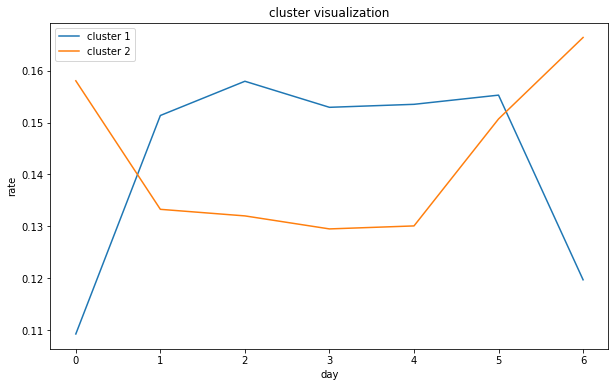

In [56]:
data_dow_k_mean = data_dow_k.groupby(by='label').mean()
fig = plt.figure(figsize=(10,6))

for i in range(2):
    plt.plot(range(7), 
         data_dow_k_mean.iloc[i,:7], 
         label = 'cluster {}'.format(i+1)) 

plt.title('cluster visualization')
plt.xlabel('day')
plt.ylabel('rate')
plt.legend()
plt.show()

In [57]:
# Gaussian mixture models
from sklearn.mixture import GaussianMixture

In [59]:
data_dow_g = data3.loc[:,'day_Sun':'day_Sat']
range_n_clusters = range(2,15)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters,random_state = 20221111)
    res = gmm.fit(data_dow_g)
    labels=res.predict(data_dow_g)   
    silhouette = silhouette_score(data_dow_g, labels)
    print("n_clusters = {},".format(n_clusters)+" the average silhouette is : {}".format(silhouette))

n_clusters = 2, the average silhouette is : 0.5738016662618166
n_clusters = 3, the average silhouette is : 0.2221615446913925
n_clusters = 4, the average silhouette is : 0.2088862383112086
n_clusters = 5, the average silhouette is : 0.20259254367557133
n_clusters = 6, the average silhouette is : 0.1925572311891222
n_clusters = 7, the average silhouette is : 0.1357520202770676
n_clusters = 8, the average silhouette is : 0.11914133655793928
n_clusters = 9, the average silhouette is : 0.12346172301560081
n_clusters = 10, the average silhouette is : 0.12582519012454316
n_clusters = 11, the average silhouette is : 0.14409964029155373
n_clusters = 12, the average silhouette is : 0.11620609932468687
n_clusters = 13, the average silhouette is : 0.10472364650883605
n_clusters = 14, the average silhouette is : 0.1177204038239522


In [60]:
gmm = GaussianMixture(random_state = 100, n_components = 2)
res = gmm.fit(data_dow_g)
labels=res.predict(data_dow_g)
data_dow_g['label']=labels
data_dow_g_result=data_dow_g.groupby(by='label').count()
data_dow_g_result.iloc[:,0]

label
0    89
1    30
Name: day_Sun, dtype: int64

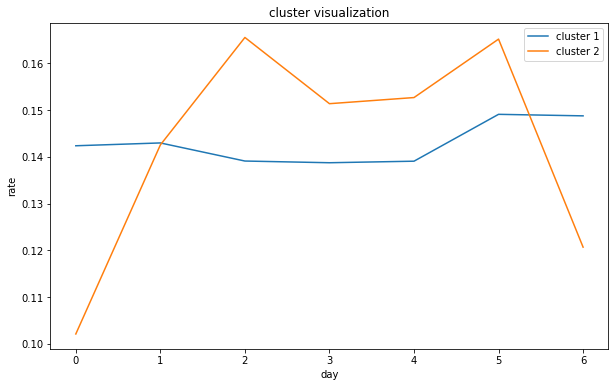

In [61]:
data_dow_g_mean = data_dow_g.groupby(by='label').mean()
fig = plt.figure(figsize=(10,6))

for i in range(2):
    plt.plot(range(7), 
         data_dow_g_mean.iloc[i,:7], 
         label = 'cluster {}'.format(i+1)) 

plt.title('cluster visualization')
plt.xlabel('day')
plt.ylabel('rate')
plt.legend()
plt.show()

In [62]:
# Bottom-up hierarchical clustering with "single link" distance metric
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [63]:
data_dow_single = data3.loc[:,'day_Sun':'day_Sat']
range_n_clusters = range(2,15)
Z_single = linkage(data_dow_single, 'single')

for k in range_n_clusters:
    labels=fcluster(Z_single, k, criterion='maxclust')    
    silhouette = silhouette_score(data_dow_single, labels)
    print("n_clusters = {},".format(k)+" the average silhouette is : {}".format(silhouette))

n_clusters = 2, the average silhouette is : 0.6377648080667613
n_clusters = 3, the average silhouette is : 0.5568477382969328
n_clusters = 4, the average silhouette is : 0.40557775075981545
n_clusters = 5, the average silhouette is : 0.3877038188748669
n_clusters = 6, the average silhouette is : 0.39007619510221897
n_clusters = 7, the average silhouette is : 0.34621844820394365
n_clusters = 8, the average silhouette is : 0.328998157643559
n_clusters = 9, the average silhouette is : 0.3254219274892415
n_clusters = 10, the average silhouette is : 0.31321510390503554
n_clusters = 11, the average silhouette is : 0.21831462782301678
n_clusters = 12, the average silhouette is : 0.15913660974826901
n_clusters = 13, the average silhouette is : 0.08885073202229973
n_clusters = 14, the average silhouette is : 0.034192948060948164


In [64]:
labels=fcluster(Z_single, 2, criterion='maxclust')
data_dow_single['label']=labels
data_dow_single.groupby(by='label').count().iloc[:,0]

label
1    118
2      1
Name: day_Sun, dtype: int64

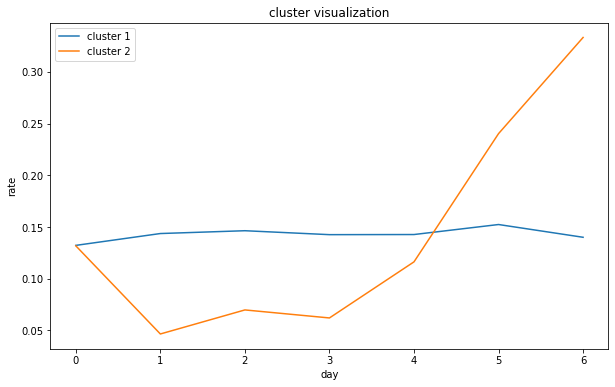

In [65]:
data_dow_single_mean = data_dow_single.groupby(by='label').mean()
fig = plt.figure(figsize=(10,6))

for i in range(2):
    plt.plot(range(7), 
         data_dow_single_mean.iloc[i,:7], 
         label = 'cluster {}'.format(i+1)) 

plt.title('cluster visualization')
plt.xlabel('day')
plt.ylabel('rate')
plt.legend()
plt.show()

In [66]:
# Bottom-up hierarchical clustering with "complete link" distance metric

data_dow_complete = data3.loc[:,'day_Sun':'day_Sat']
range_n_clusters = range(2,15)
Z_complete = linkage(data_dow_complete, 'complete')

for k in range_n_clusters:
    labels=fcluster(Z_complete, k, criterion='maxclust')    
    silhouette = silhouette_score(data_dow_complete, labels)
    print("n_clusters = {},".format(k)+" the average silhouette is : {}".format(silhouette))

n_clusters = 2, the average silhouette is : 0.6100646113547024
n_clusters = 3, the average silhouette is : 0.17268718146566103
n_clusters = 4, the average silhouette is : 0.192151693747686
n_clusters = 5, the average silhouette is : 0.15025207822499756
n_clusters = 6, the average silhouette is : 0.1522968157222807
n_clusters = 7, the average silhouette is : 0.14926267616109432
n_clusters = 8, the average silhouette is : 0.10130440123428013
n_clusters = 9, the average silhouette is : 0.10066503899164748
n_clusters = 10, the average silhouette is : 0.11061132431547051
n_clusters = 11, the average silhouette is : 0.12537141856431555
n_clusters = 12, the average silhouette is : 0.11418383303622555
n_clusters = 13, the average silhouette is : 0.11216165708562778
n_clusters = 14, the average silhouette is : 0.10909628423478133


In [67]:
labels=fcluster(Z_complete, 2, criterion='maxclust')
data_dow_complete['label']=labels
data_dow_complete.groupby(by='label').count().iloc[:,0]

label
1      2
2    117
Name: day_Sun, dtype: int64

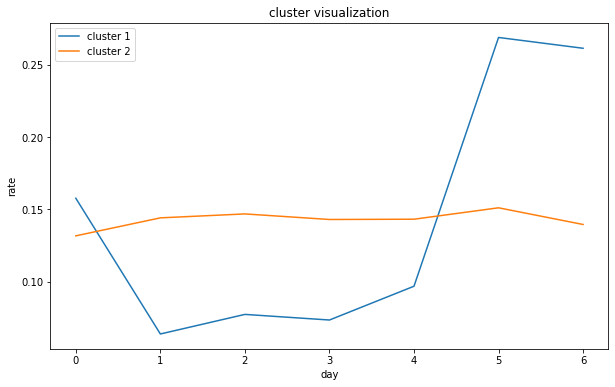

In [68]:
data_dow_complete_mean = data_dow_complete.groupby(by='label').mean()
fig = plt.figure(figsize=(10,6))

for i in range(2):
    plt.plot(range(7), 
         data_dow_complete_mean.iloc[i,:7], 
         label = 'cluster {}'.format(i+1)) 

plt.title('cluster visualization')
plt.xlabel('day')
plt.ylabel('rate')
plt.legend()
plt.show()